## Spam Mail Prediction utilizing feature extraction

In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC
import seaborn as sn

**Preprocesing**

Loading dataset

In [14]:
import chardet
with open('spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [15]:
data = pd.read_csv('spam.csv', encoding='Windows-1252')

Reading dataset

In [16]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [18]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1, inplace=True)

In [28]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [31]:
data.v1.replace({'spam':1, 'ham':0}, inplace=True)

In [32]:
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
X= data.v2
y= data.v1

Feature Extraction

In [34]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase='True')
X= feature_extraction.fit_transform(X)

In [59]:
print(X.shape)
print(y.value_counts())

(5572, 8405)
0    4825
1     747
Name: v1, dtype: int64


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

**Model Training**

In [62]:
model = LinearSVC()
model.fit(X,y)

LinearSVC()

**Model Training**

Model accuracy scores

In [63]:
print("Accuracy on training set", model.score(X_train, y_train))
print("Accuracy on test set", model.score(X_test, y_test))

Accuracy on training set 0.9997756338344178
Accuracy on test set 0.9991031390134529


Model prediction

In [69]:
input = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."]
# convert text to feature vectors
input = feature_extraction.transform(input)

#making prediction
prediction = model.predict(input)

if(prediction[0]==0):
    print('HAM MAIL')
else:
    print('SPAM MAIL')

y_pred = model.predict(X_test)

HAM MAIL


Classification report

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       966
           1       1.00      0.99      1.00       149

    accuracy                           1.00      1115
   macro avg       1.00      1.00      1.00      1115
weighted avg       1.00      1.00      1.00      1115



Confusion Matrix

<AxesSubplot:>

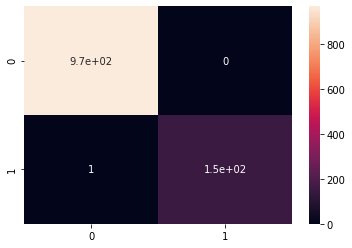

In [73]:
cm = confusion_matrix(y_true= y_test, y_pred= y_pred)
sn.heatmap(cm, annot=True)